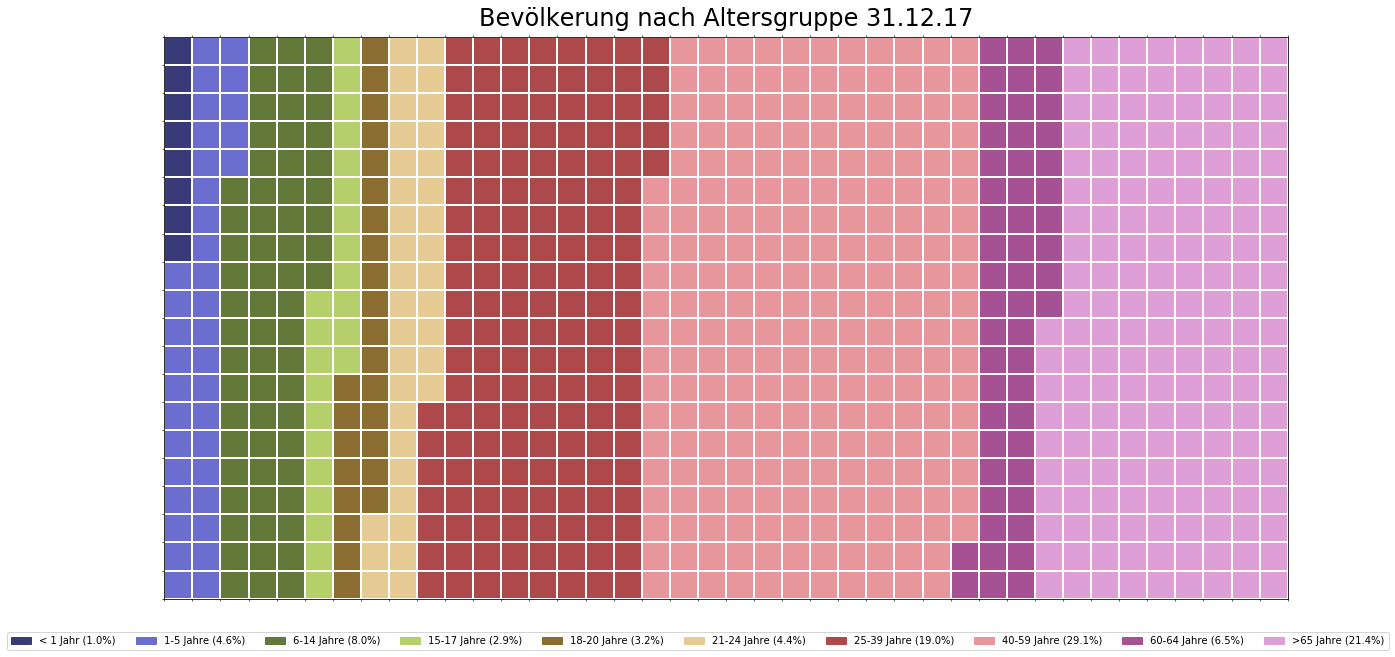

In [161]:
custom_mat_show(grid)

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

%matplotlib inline

In [40]:
keys_data = ['< 1 Jahr',
             '1-5 Jahre',
             '6-14 Jahre',
             '15-17 Jahre',
             '18-20 Jahre',
             '21-24 Jahre',
             '25-39 Jahre',
             '40-59 Jahre',
             '60-64 Jahre',
             '>65 Jahre']

raw_data = {'< 1 Jahr': 0.79,
           '1-5 Jahre': 3.79,
           '6-14 Jahre': 6.59,
           '15-17 Jahre': 2.37,
           '18-20 Jahre': 2.63,
           '21-24 Jahre': 3.68,
           '25-39 Jahre': 15.75,
           '40-59 Jahre': 24.10,
           '60-64 Jahre': 5.38,
           '>65 Jahre':17.71}

In [46]:
series_data = pd.Series(raw_data, index=keys_data)

In [84]:
df = series_data.to_frame()
df.columns = ['Abs. in Mill.']
df['Anteil'] = df.iloc[:,0] / df.iloc[:,0].sum()

In [162]:
def create_waffle_array(x_dim, y_dim, fractions):
    total_tiles = x_dim * y_dim
    waffle_grid = np.zeros(shape=(total_tiles))
    start_tile = 0
    class_label = 0
    for fraction in fractions:
        number_tiles = int(np.round(total_tiles * fraction))
        waffle_grid[start_tile:start_tile+number_tiles] = class_label
        start_tile = start_tile + number_tiles
        class_label += 1
    
    waffle_grid = waffle_grid.reshape((x_dim, y_dim), order='F')
    
    return waffle_grid

In [163]:
grid = create_waffle_array(20,40,df['Anteil'].values)

In [164]:
def custom_mat_show(grid):
    fig, ax = plt.subplots(figsize=(16,9))
    colormap = plt.cm.tab20b
    mappable = ax.matshow(grid, cmap='tab20b')
    # fig.colorbar(mappable)
    ax.set_xticks(np.arange(-.5, (grid.shape[1]), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (grid.shape[0]), 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
        
    ax.set_xticks([])
    ax.set_yticks([])
    
    values = list(range(len(df['Anteil'])))
    total_values = len(df['Anteil']) - 1

    # create legend
    legend_handles = []
    for i, category in enumerate(df.index.values):
        label_str = category + ' (' + str(np.round(df['Anteil'][i]*100, decimals=1)) + '%)'
        color_val = colormap(float(values[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(handles=legend_handles,
               loc='lower center', 
               ncol=len(df.index.values),
               bbox_to_anchor=(0., -0.1, 0.95, .1)
              )
    fig.tight_layout()
    fig.suptitle('Bevölkerung nach Altersgruppe 31.12.17', fontsize=24)
